# ALGORITHMS FOR COLLECTIVE OPERATION ANALYSIS

Import necessary libraries

In [1]:
import pandas as pd
import os

from utilities_pr1 import theory_and_experiment_plot, plot_errors
from utilities_pr1 import build_intercore_latency_matrix
from utilities_pr1 import compute_linear_broadcast_time, compute_chain_broadcast_latency, compute_binary_tree_broadcast_latency

Load the data

In [2]:
path = r"C:\Users\matte\Documents\HPC\FINAL\HighPerformanceComputing-Monitoring-and-Parallel-Coding\Project 1\output"

df_broad_fix1 = pd.read_csv(os.path.join(path, "broadcast_fixed", "broadcast_algo1_fixed_core.csv"))
df_broad_fix2_0 = pd.read_csv(os.path.join(path, "broadcast_fixed", "broadcast_algo2_fixed_core.csv"))
df_broad_fix2_1 = pd.read_csv(os.path.join(path, "broadcast_fixed", "broadcast_algo2_fixed_core_secondpart.csv"))
df_broad_fix2 = pd.concat([df_broad_fix2_0.iloc[:-1:, :], df_broad_fix2_1], axis = 0)
df_broad_fix2.reset_index(inplace=True, drop=True)
df_broad_fix3 = pd.read_csv(os.path.join(path, "broadcast_fixed", "broadcast_algo3_fixed_core.csv"))

df_broad_var1 = pd.read_csv(os.path.join(path, "broadcast_var", "broadcast_algo1_variable_core.csv"))
df_broad_var2 = pd.read_csv(os.path.join(path, "broadcast_var", "broadcast_algo2_variable_core.csv"))
df_broad_var3 = pd.read_csv(os.path.join(path, "broadcast_var", "broadcast_algo3_variable_core.csv"))

df_reduce_fix1 = pd.read_csv(os.path.join(path, "reduce_fixed", "reduce_algo1_fixed_core.csv"))
df_reduce_fix2 = pd.read_csv(os.path.join(path, "reduce_fixed", "reduce_algo2_fixed_core.csv"))
df_reduce_fix3 = pd.read_csv(os.path.join(path, "reduce_fixed", "reduce_algo3_fixed_core.csv"))

df_reduce_var1 = pd.read_csv(os.path.join(path, "reduce_var", "reduce_algo1_variable_core.csv"))
df_reduce_var2 = pd.read_csv(os.path.join(path, "reduce_var", "reduce_algo2_variable_core.csv"))
df_reduce_var3 = pd.read_csv(os.path.join(path, "reduce_var", "reduce_algo3_variable_core.csv"))


# Latency to 10e-6 seconds
df_broad_fix1['Latency'] = df_broad_fix1['Latency'] * (10**-6)
df_broad_fix2['Latency'] = df_broad_fix2['Latency'] * (10**-6)
df_broad_fix3['Latency'] = df_broad_fix3['Latency'] * (10**-6)
df_broad_var1['Latency'] = df_broad_var1['Latency'] * (10**-6)
df_broad_var2['Latency'] = df_broad_var2['Latency'] * (10**-6)
df_broad_var3['Latency'] = df_broad_var3['Latency'] * (10**-6)
df_reduce_fix1['Latency'] = df_reduce_fix1['Latency'] * (10**-6)
df_reduce_fix2['Latency'] = df_reduce_fix2['Latency'] * (10**-6)
df_reduce_fix3['Latency'] = df_reduce_fix3['Latency'] * (10**-6)
df_reduce_var1['Latency'] = df_reduce_var1['Latency'] * (10**-6)
df_reduce_var2['Latency'] = df_reduce_var2['Latency'] * (10**-6)
df_reduce_var3['Latency'] = df_reduce_var3['Latency'] * (10**-6)

In [3]:
LATENCY_MATRIX = build_intercore_latency_matrix()

## Broadcast Algorithms

### Basic Linear

The **Basic Linear algorithm total communication time** based on number of processes $n$ is:


$$T(n) = \max_{p=1}^{n-1} T_{r \rightarrow p} + O \cdot n$$

with:
- $T_{r \rightarrow i}$ is the communication time from root process to process $p$
- $O$ is the overhead factor per process (time to handle/process the message)


In [15]:
# Model predictions across different process counts
linear_broadcast_predictions = {}
for n_processes in range(2, 257):  # Sweep from 2 to 256 processes
    linear_broadcast_predictions[n_processes] = compute_linear_broadcast_time(
        comm_latency_matrix=LATENCY_MATRIX,
        process_count=n_processes,
        source_rank=0,
        processing_overhead=0.11e-6
    )

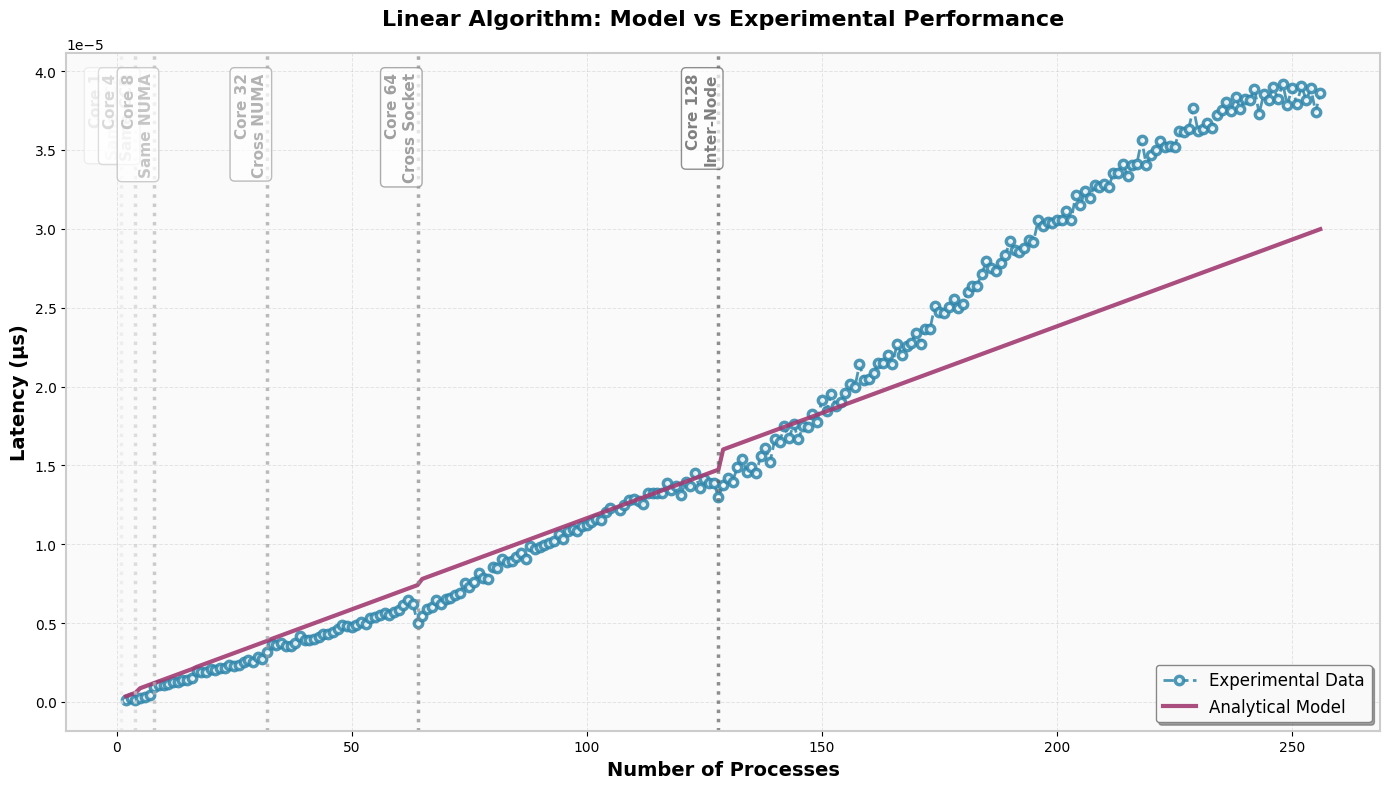

In [16]:
theory_and_experiment_plot(df_broad_fix1, linear_broadcast_predictions, 'Linear Algorithm', 'lower right')

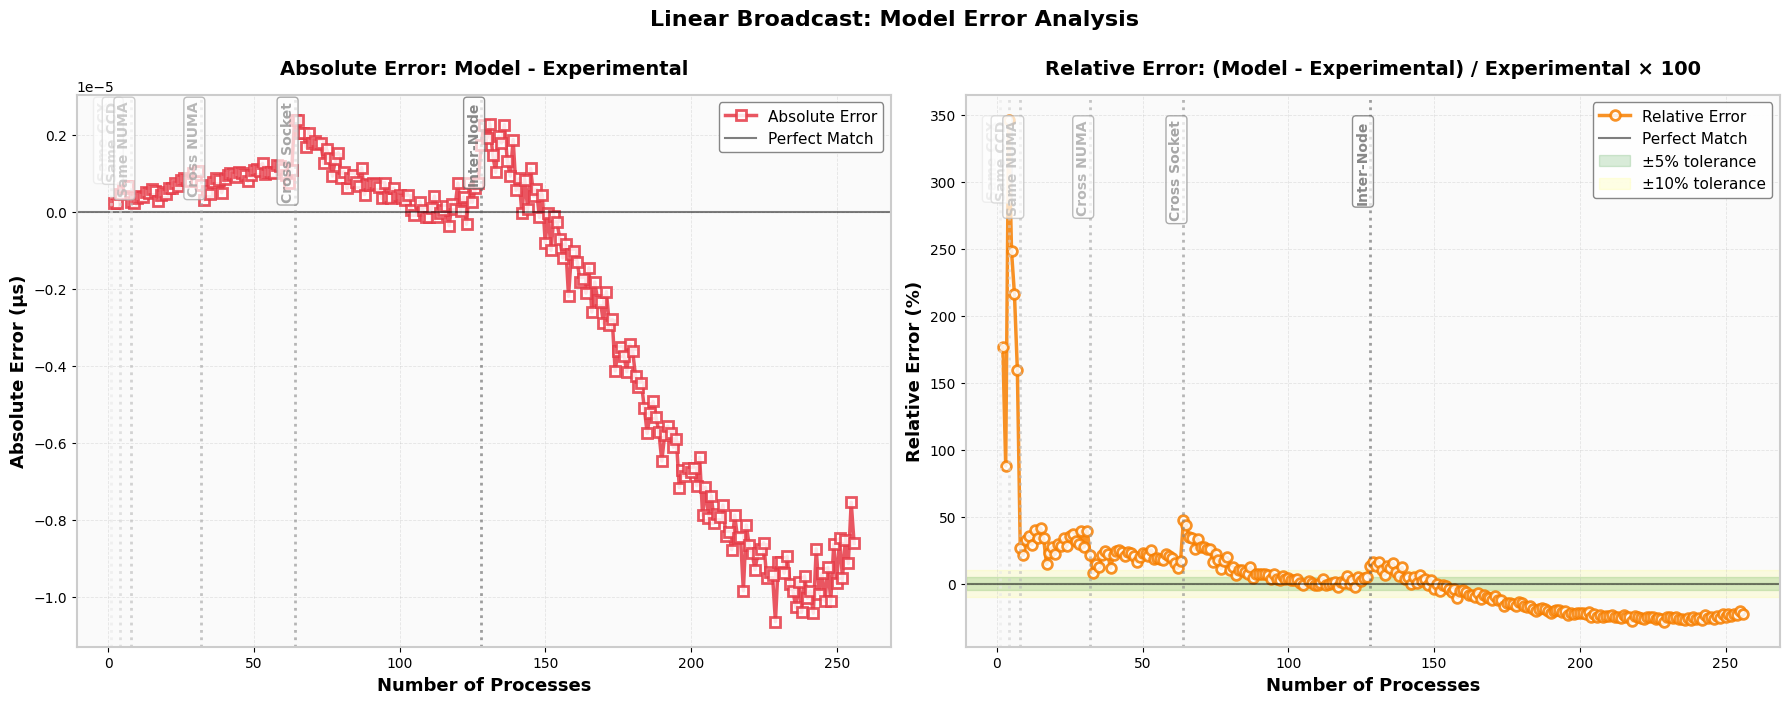

In [17]:
plot_errors(df_broad_fix1, linear_broadcast_predictions, 'upper right', 'upper right')

### Pipeline

The **Pipeline algorithm total communication time** based on number of processes $n$ is:

$$T(n) = \sum_{p=0}^{n-2} T_{p \rightarrow p+1}$$

with:
- $T_{p \rightarrow p+1}$ is the communication time from process $p$ to process $p+1$

In [18]:
# Model predictions across different process counts
pipeline_broadcast_predictions = {}
for n_processes in range(2, 257):  # Sweep from 2 to 256 processes
    pipeline_broadcast_predictions[n_processes] = compute_chain_broadcast_latency(
        comm_matrix=LATENCY_MATRIX,
        process_count=n_processes,
        source_rank=0
    )

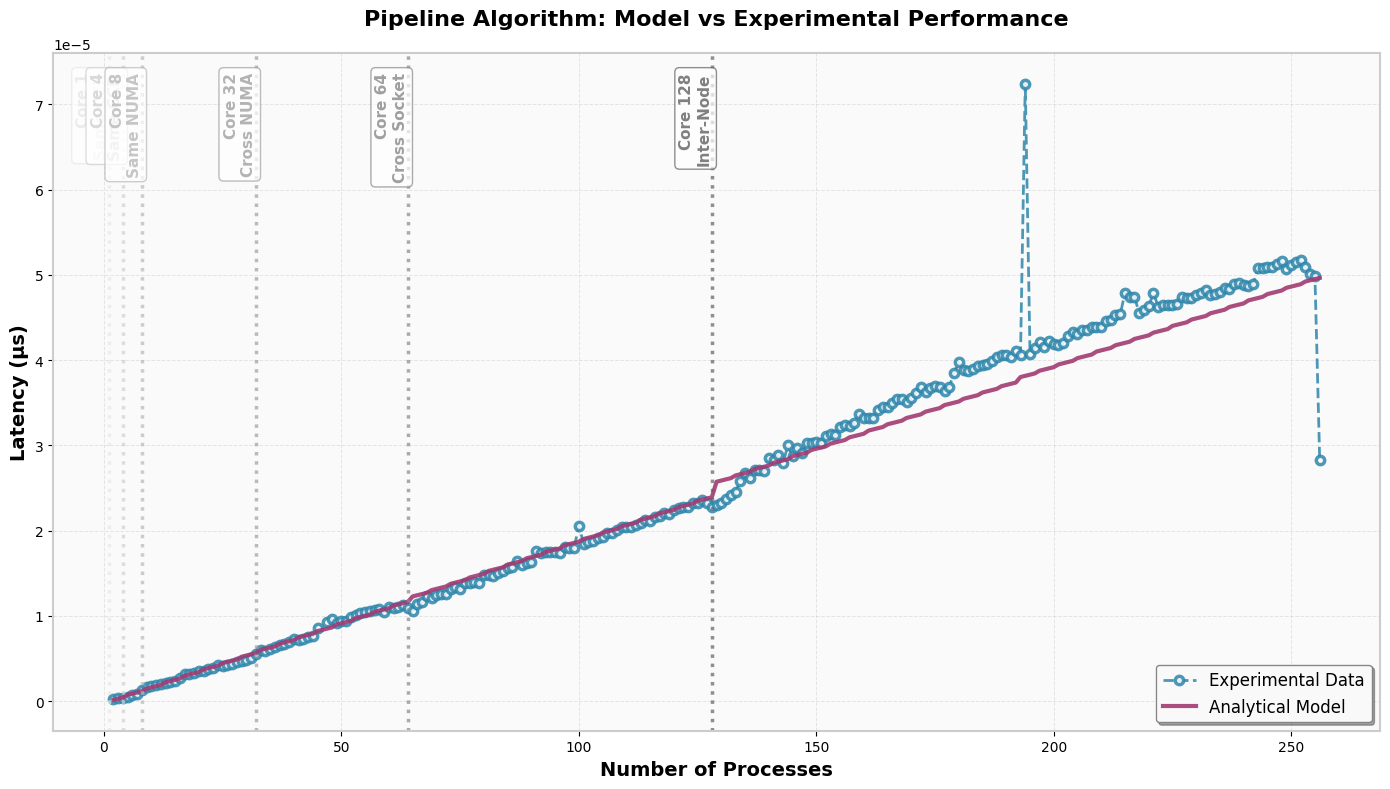

In [19]:
theory_and_experiment_plot(df_broad_fix2, pipeline_broadcast_predictions, 'Pipeline Algorithm', 'lower right')

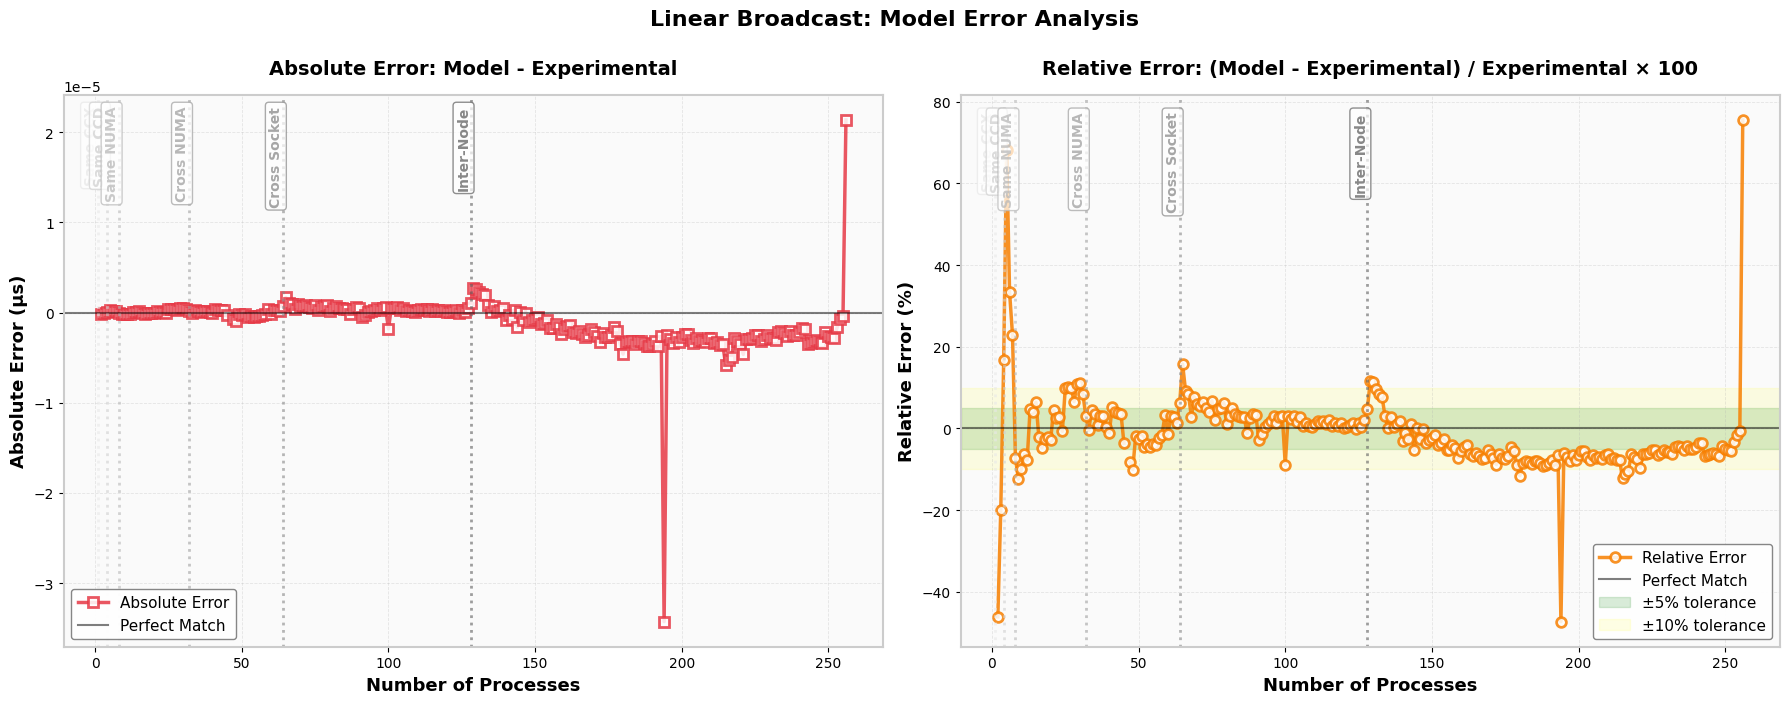

In [21]:
plot_errors(df_broad_fix2, pipeline_broadcast_predictions, 'lower left', 'lower right')

### Binary Tree

The **Binary Tree algorithm total communication time** based on number of processes $n$ is:


$$T(n) = \sum_{lv=1}^{height_{tree}} \max_{node \in S(lv)} T_{P(node) \rightarrow node} + O \cdot n$$

with:

- $height_{tree}$ is the computed tree height, which by definition is $\lceil\log_{2}(n)\rceil$
- $S(lv)$ represents all nodes at level $lv$
- $P(node)$ represents the parent of the node, higher leaf in the subtree.
- $T_{P(node) \rightarrow node}$ is the communication time from parent to node
- $O$ is the overhead factor per process  (time to handle/process the message)

In [11]:
# Model predictions across different process counts
tree_broadcast_predictions = {}
for n_processes in range(2, 257):  # Sweep from 2 to 256 processes
    tree_broadcast_predictions[n_processes] = compute_binary_tree_broadcast_latency(
        comm_matrix=LATENCY_MATRIX,
        process_count=n_processes,
        processing_overhead=0.015e-6
    )

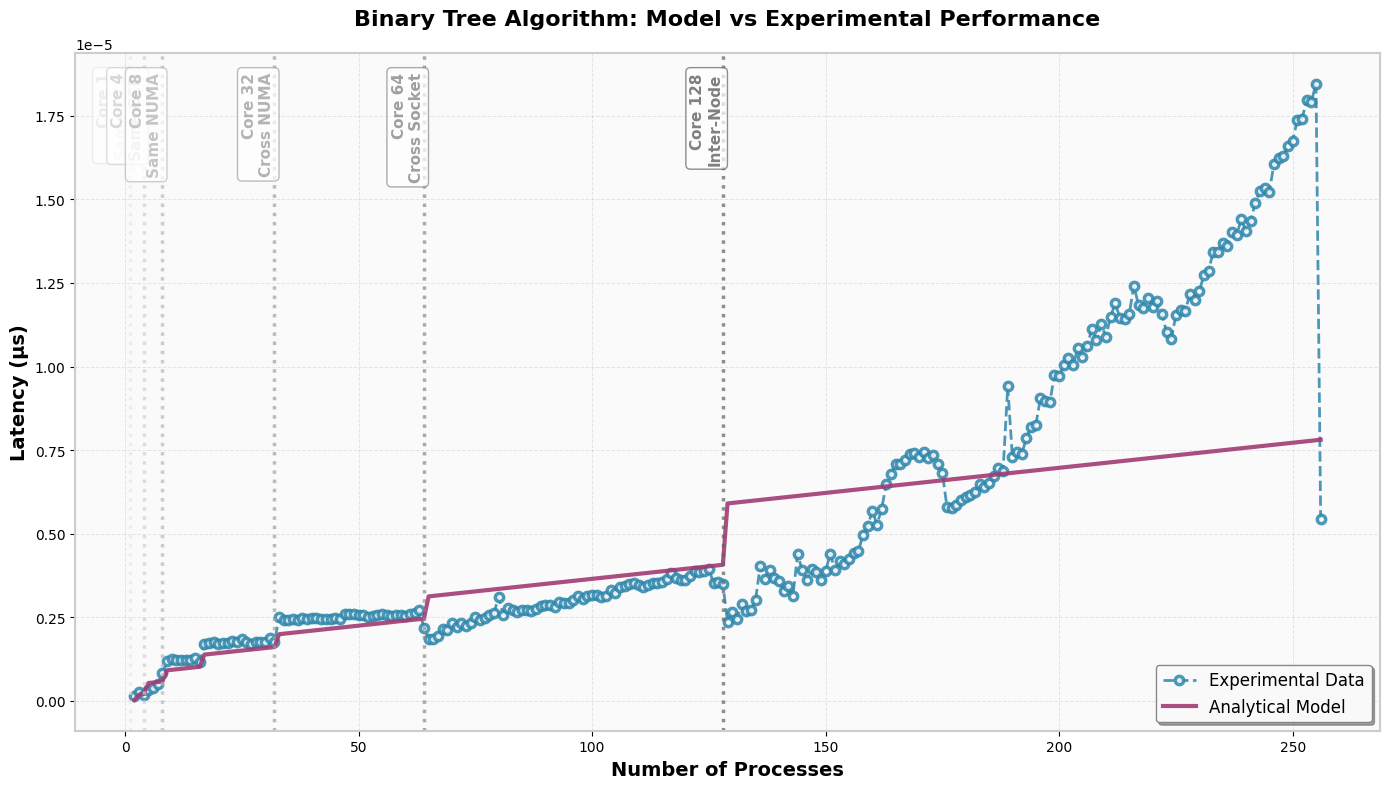

In [12]:
theory_and_experiment_plot(df_broad_fix3, tree_broadcast_predictions, 'Binary Tree Algorithm', 'lower right')

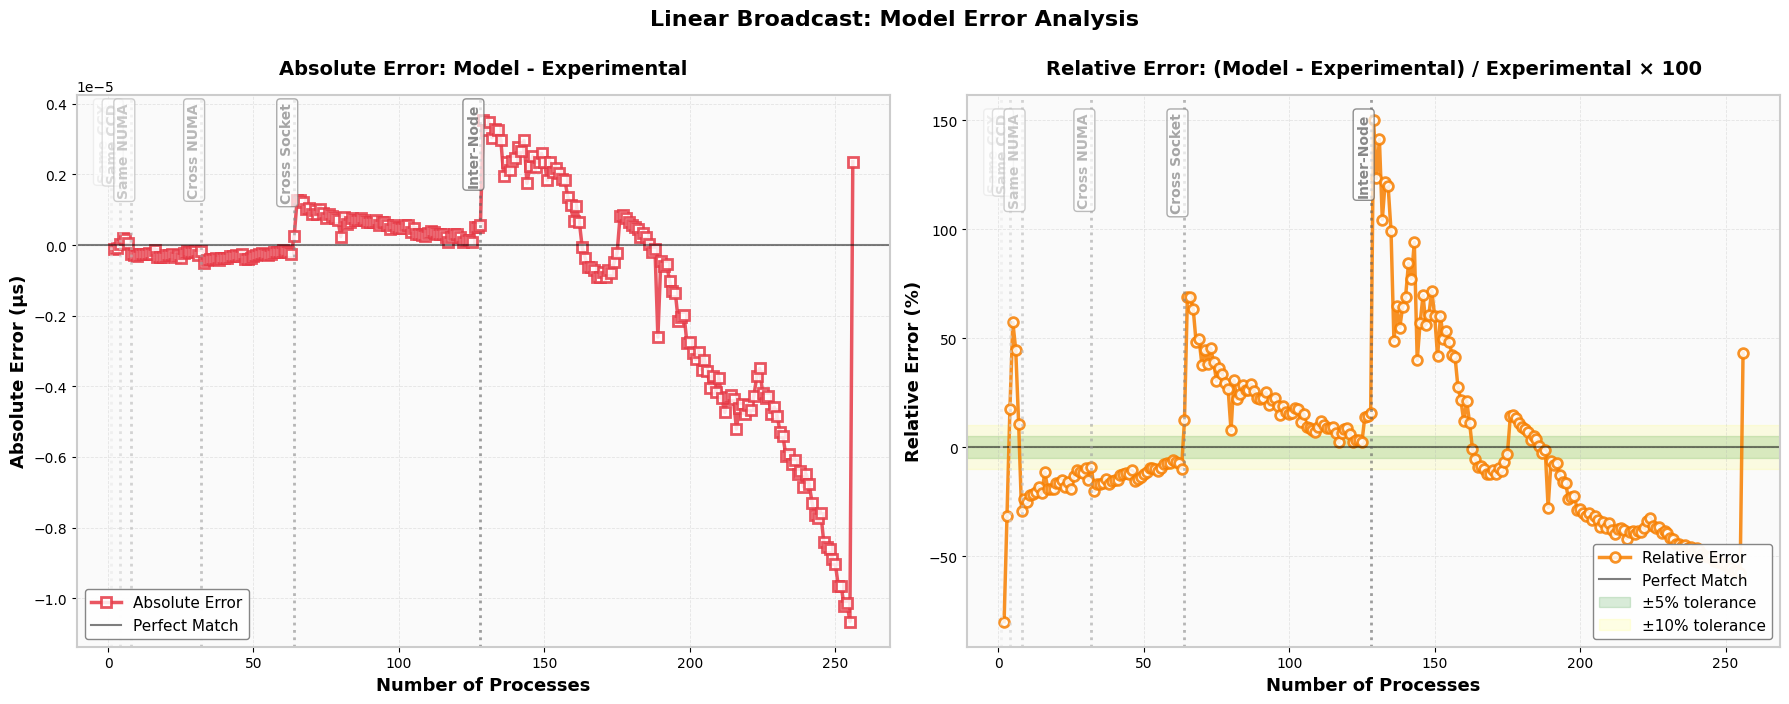

In [22]:
plot_errors(df_broad_fix3, tree_broadcast_predictions, 'lower left', 'lower right')

## Reduce Algorithms

### Linear

### Chain

### Binary